In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy import stats

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_df = pd.DataFrame(mouse_metadata)
study_results_df = pd.DataFrame(study_results)
study_merged_df = pd.merge(mouse_metadata_df, study_results_df, how="left", on="Mouse ID")

# Display the data table for preview
study_merged_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
study_merged_df["Mouse ID"].nunique()


249

In [28]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_data = study_merged_df.duplicated(subset=["Mouse ID", "Timepoint", "Tumor Volume (mm3)"])
duplicate_rows = study_merged_df[duplicate_mouse_data]
duplicate_mouse_id = duplicate_rows["Mouse ID"].unique()
duplicate_mouse_id_type = study_merged_df["Mouse ID"].dtype
print(duplicate_mouse_id)
print(f"dytpe={duplicate_mouse_id_type}")

['g989']
dytpe=object


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_merged_df.loc[study_merged_df["Mouse ID"] == "g989", :]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_to_drop = "g989"
rows_to_drop = study_merged_df[study_merged_df["Mouse ID"] == mouse_to_drop].index

# Drop the duplicate rows from the original DataFrame
cleaned_df = study_merged_df.drop(rows_to_drop)
cleaned_df["Mouse ID"].nunique()
cleaned_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [31]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
regimen_mean = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sterror = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

stats_dict = {
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Tumor Volume Variance": regimen_var,
    "Tumor Volume Std. Dev": regimen_std,
    "Tumor Volume Std. Error": regimen_sterror
}

regimen_stats_df = pd.DataFrame(stats_dict)

print(regimen_stats_df)

              Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor Volume S

In [32]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_stats_grouped = cleaned_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
regimen_stats_grouped

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Drug Regimen')

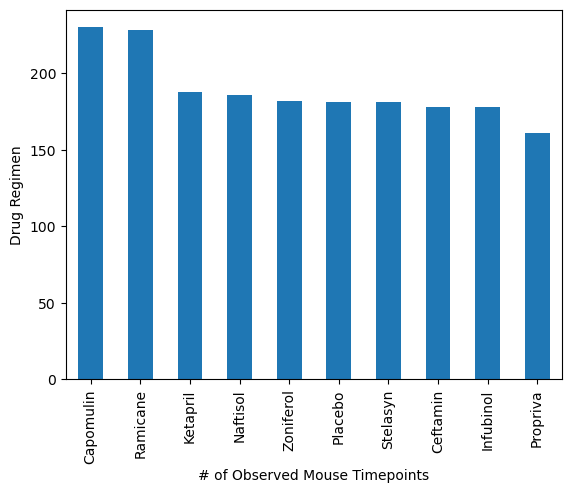

In [33]:
mouse_tp = study_merged_df.groupby("Drug Regimen")["Timepoint"].count()
mouse_tp_sort = mouse_tp.sort_values(ascending=False)

mouse_tp_sort.plot(kind="bar")
plt.xlabel("# of Observed Mouse Timepoints")
plt.ylabel("Drug Regimen")


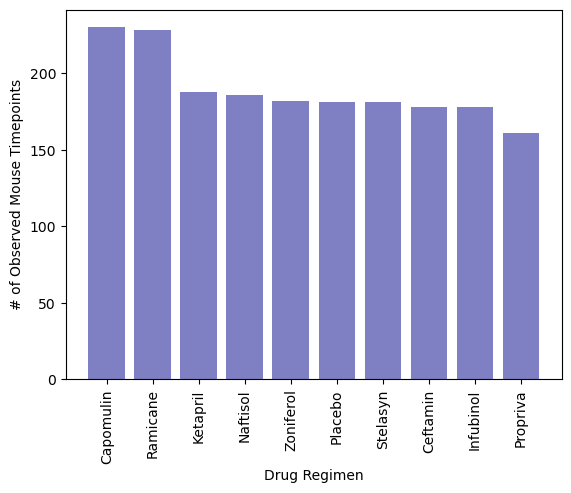

In [34]:
mouse_tp = study_merged_df.groupby("Drug Regimen")["Timepoint"].count()
mouse_tp_sort = mouse_tp.sort_values(ascending=False)

drug_regimens = mouse_tp_sort.index
timepoint_count = mouse_tp_sort.values 

plt.bar(drug_regimens, timepoint_count, color="darkblue", alpha=0.5, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90);

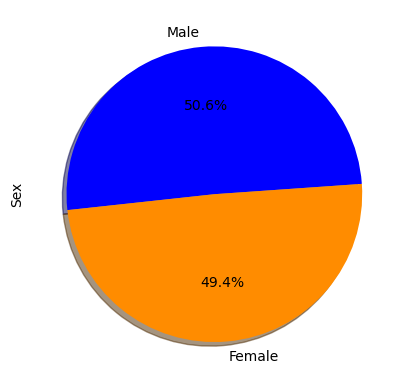

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_count = study_merged_df["Sex"].value_counts()

sex_count.plot(kind="pie", explode=[0,0], labels=["Male", "Female"], colors=["blue", "darkorange"],
        autopct="%1.1f%%", shadow=True, startangle=4);

plt.ylabel("Sex");

Text(0, 0.5, 'Sex')

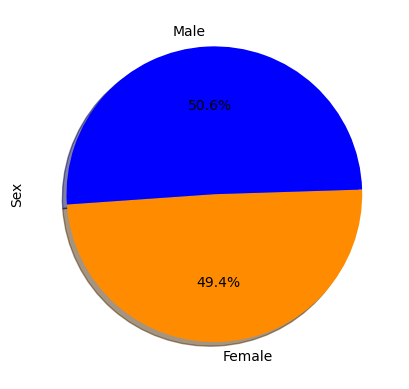

In [36]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_f = study_merged_df["Sex"].value_counts()["Female"]
mouse_m = study_merged_df["Sex"].value_counts()["Male"]

sex_count = [mouse_f, mouse_m]
colors = ["darkorange", "blue"]
labels = ["Female", "Male"]
explode = [0,0]

plt.pie(sex_count, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=184);

plt.ylabel("Sex")

In [37]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
mouse_high_vol = study_merged_df.loc[(study_merged_df["Drug Regimen"] == "Capomulin") |
                                              (study_merged_df["Drug Regimen"] == "Ramicane") |
                                              (study_merged_df["Drug Regimen"] == "Infubinol") |
                                              (study_merged_df["Drug Regimen"] == "Ceftamin"), :]
mouse_high_vol.head()
# Start by getting the last (greatest) timepoint for each mouse
high_tp = mouse_high_vol.groupby("Mouse ID")["Timepoint"].max()

high_tp_df = mouse_high_vol.loc[mouse_high_vol.set_index(["Mouse ID", "Timepoint"]).index.isin(high_tp.reset_index().set_index(["Mouse ID", "Timepoint"]).index)]
# Display the new DataFrame
#print(high_tp_df)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
high_tp_merge_df = pd.merge(high_tp_df, study_merged_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]], on=["Mouse ID", "Timepoint"], how="left")
high_tp_merge_df.drop(columns=["Tumor Volume (mm3)_y"], inplace=True)
high_tp_merge_df.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume at Last Timepoint"}, inplace=True)
high_tp_merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume at Last Timepoint,Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [38]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

selected_columns = ["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
treatment_tumor_data_df = pd.DataFrame(cleaned_df[selected_columns])
target_treatments = treatment_tumor_data_df.loc[treatment_tumor_data_df["Drug Regimen"].isin(treatments)]
    
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    drug_data = treatment_tumor_data_df.loc[treatment_tumor_data_df["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    #drug_data = treatment_tumor_data_df[treatment_tumor_data_df["Drug Regimen"] == drug]["Tumor Volume (mm3)"]
    tumor_vol_data.append(drug_data)

# add subset 
capomulin_data = sorted(tumor_vol_data[0])
ramicane_data = sorted(tumor_vol_data[1])
infubinol_data = sorted(tumor_vol_data[2])
ceftamin_data = sorted(tumor_vol_data[3])
tumor_vol_data_update = [capomulin_data, ramicane_data, infubinol_data, ceftamin_data]
# Determine outliers using upper and lower bounds
for i in range(len(tumor_vol_data_update)):
    data = pd.Series(tumor_vol_data_update[i])
    drug_name = treatments[i]

    quartiles = data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    potential_outliers = [x for x in data if x < lower_bound or x > upper_bound]

Text(0, 0.5, 'Final Tumor Volume (mm3)')

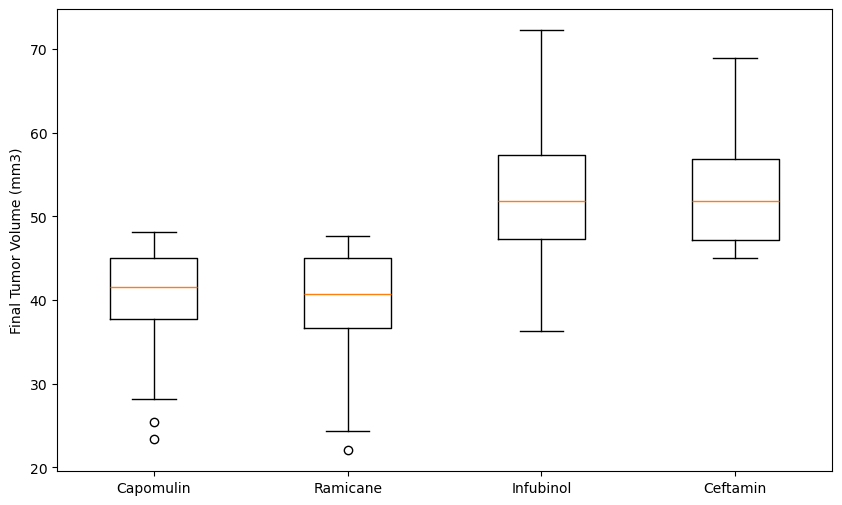

In [39]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data_update, labels=treatments)
plt.ylabel("Final Tumor Volume (mm3)")

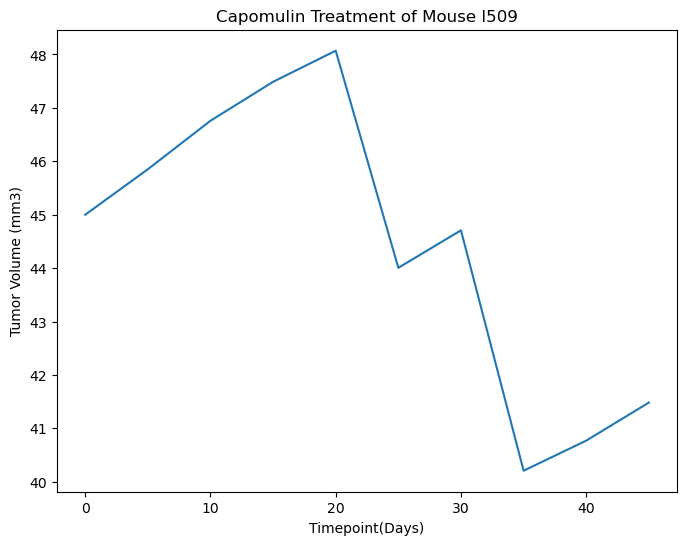

In [40]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_509 = cleaned_df.loc[(cleaned_df["Mouse ID"] == "l509") | (cleaned_df["Mouse ID"] == "i509"), :]

x_values = mouse_509["Timepoint"]
y_values = mouse_509["Tumor Volume (mm3)"]

plt.figure(figsize=(8,6))
plt.plot(x_values, y_values, linestyle="-")
plt.title("Capomulin Treatment of Mouse l509")
plt.xlabel("Timepoint(Days)")
plt.ylabel("Tumor Volume (mm3)");



In [41]:
capo_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

capo_mouse_info = capo_data.groupby("Mouse ID").first()[["Weight (g)"]].reset_index()
capo_tumor_size_mean = capo_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean().reset_index()

weight_tumor_dist_df = pd.merge(capo_mouse_info, capo_tumor_size_mean, on="Mouse ID")

x_axis = weight_tumor_dist_df["Weight (g)"]
y_axis = weight_tumor_dist_df["Tumor Volume (mm3)"]



(34.0, 46.5)

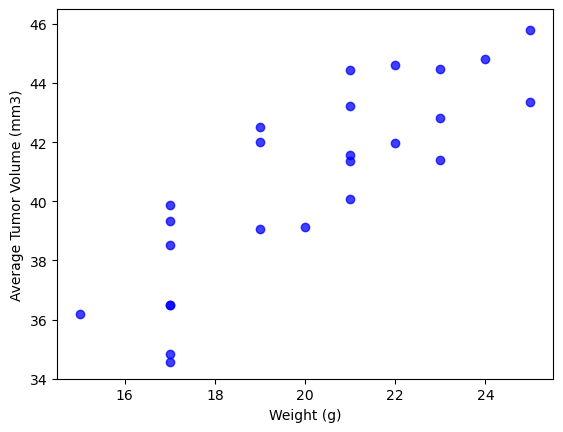

In [42]:
plt.scatter(x_axis, y_axis, facecolors="blue", alpha=0.75)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46.5)

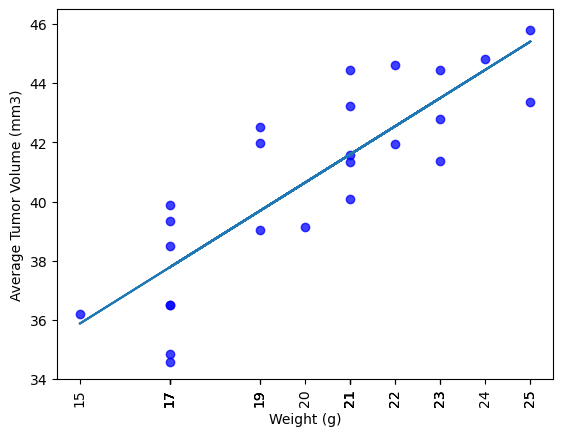

In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

slope, intercept, mw_r, mw_p, std_err = stats.linregress(x_axis, y_axis)
mw_fit = slope * x_axis + intercept

plt.scatter(x_axis, y_axis, facecolors="blue", alpha=0.75)
plt.plot(x_axis,mw_fit,"-")
plt.xticks(x_axis, rotation=90)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.ylim(34, 46.5);